# Welcome to this notebook on Simultaneous Perturbation Stochastic Approximation (SPSA).

## What is SPSA?

SPSA is an algorithm developed by Spall (see: https://www.jhuapl.edu/spsa/). It can be used if noisy and unbiased measurements of the gradient $g(\boldsymbol{\theta}$) are available, or when this is not the case and thus (noisy) measurements of the loss function $f(\boldsymbol{\theta})$ are used.

The advantage of SPSA compared to other algorithms, is that only two loss measurements are required to generate an update. Therefore, SPSA is scalable.


## How does SPSA work?
Let $\eta_i$ be a scalar, $\omega_i$ a sample, and $\Delta_i$ be a random vector such that $\{\Delta_i\}$ is an iid sequence with $\Delta_i(k)$ and $1/\Delta_i(k)$ bounded and symmetric around zero. The components $\Delta_i(k)$ are mutually independent (note: in practice often the Bernoulli distribution is used for $\Delta_i$).

The SPSA algorithm is then as follows:

___
**Start**: Choose starting value $\theta_0$, learning rate $\epsilon$ and take $i = 0$.
___
**Algorithm**:
1) Calculate $(g_i^{SPSA}(\omega_i, \theta_i))_j = \frac{f(\omega_i, \theta_i+\eta_i\Delta_i)-f(\omega_i, \theta_i-\eta_i\Delta_i)}{2\eta_i\Delta_i(j)}$. 
2) Update $\theta_{i+1} = \theta_{i} - \epsilon (g_i)^{SPSA}(\omega_i, \theta_i))$.
3) (a) stop if $i$ large or $|\theta_{i+1}-\theta_{i}|$ small enough.  
   (b) else: update $i$ to $i+1$ and go back to (1).
__

In the implementation below, you can perform SPSA on an one-dimensional function.


## Try SPSA yourself and see what happens

In [23]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Fill in the objective function you would like to use:
def objective_f(theta):
    return np.power(theta, 2)

In [25]:
# Fill in the number of iterations you would like to run SPSA.
NR_ITERATIONS = 100

In [26]:
# Do you want to use decreasing or fixed epsilon?
EPSILON_TYPE = 'fixed' #'fixed' or 'decreasing'
# In case of fixed epsilon, fill in the value for epsilon.
EPSILON_VALUE = 0.01

In [27]:
# Fill in the starting value for the optimisation:
THETA_0 = 10

In [28]:
# Do you want to do maximization or minimization?
OPTIMIZATION_TYPE = 'minimization' #or 'maximization' 

In [29]:
def estimate_gradient(theta, i):
    
    delta_i = np.random.choice((-1, 1))
    eta_i = 1/(i+1)
    
    perturbation_high = objective_f(theta + eta_i*delta_i)
    perturbation_low = objective_f(theta - eta_i*delta_i)
    
    numerator = perturbation_high-perturbation_low
    denominator = 2*eta_i*delta_i
    
    return numerator/denominator

In [33]:
# The SPSA algorithm
def SPSA(THETA_0, EPSILON_TYPE, EPSILON_VALUE, NR_ITERATIONS):
    thetas = np.zeros(NR_ITERATIONS+1)
    gradients = np.zeros(NR_ITERATIONS)
    thetas[0] = THETA_0

    for i in range(NR_ITERATIONS):
        g = estimate_gradient(thetas[i], i)
        gradients[i] = g
        if EPSILON_TYPE == 'fixed':
            if OPTIMIZATION_TYPE == 'minimization':
                thetas[i+1] = thetas[i] - EPSILON_VALUE * g
            if OPTIMIZATION_TYPE == 'maximization':
                thetas[i+1] = thetas[i] + EPSILON_VALUE * g
        if EPSILON_TYPE == 'decreasing':
            if OPTIMIZATION_TYPE == 'minimization':
                thetas[i+1] = thetas[i] - 1/(i+1) * g
            if OPTIMIZATION_TYPE == 'maximization':
                thetas[i+1] = thetas[i] + 1/(i+1) * g
        
    return thetas, gradients

In [40]:
# Plot the iterates and objective values during the optimisation
def plot_iterate_objective_gradient(thetas, gradients):
    #Calculate the objective value at each iterate
    objective_values = objective_f(thetas)
    
    fig, axs = plt.subplots(1,3, figsize=(12,5))

    # Plot the iterate
    axs[0].plot(thetas, color="darkblue")
    axs[0].set_xlabel("Iteration")
    axs[0].set_ylabel(r"$\theta_n$")
    axs[0].set_title(r"$\theta_n$")
        
    # Plot the objective values
    axs[1].plot(objective_values, color="darkblue")
    axs[1].set_xlabel("Iteration")
    axs[1].set_ylabel(r"f($\theta_n$)")
    axs[1].set_title(r"f($\theta_n$)")
    
    # Plot the estimated gradients
    axs[2].plot(gradients, color="darkblue")
    axs[2].set_xlabel("Iteration")
    axs[2].set_ylabel(r"$g^{SPSA}$($\theta_n$)")
    axs[2].set_title(r"$g^{SPSA}$($\theta_n$)")

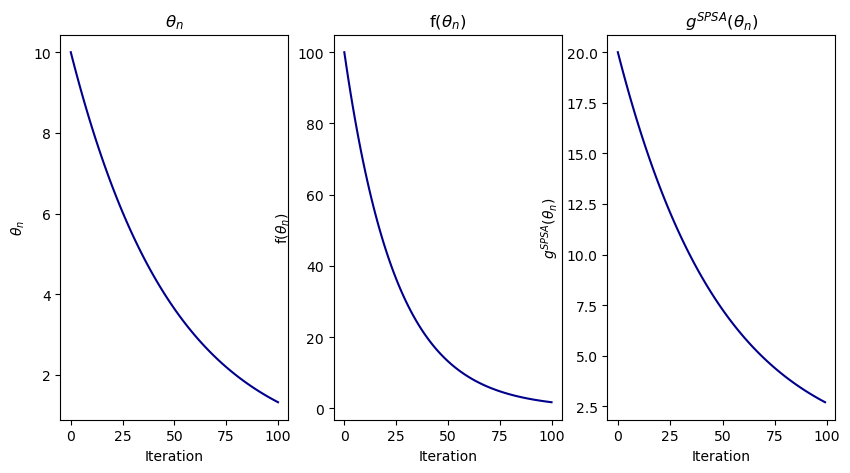

In [41]:
# Run SPSA and plot the optimisation
thetas, gradients = SPSA(THETA_0, EPSILON_TYPE, EPSILON_VALUE, NR_ITERATIONS)
plot_iterate_objective_gradient(thetas, gradients)